# HW 6

1. Translating Sentences:
10 pts
Write a function that translates sentences. The function takes two arguements, the sentence to be translated and tthe targeted language and returns the translated sentence.

At the top, wanted to mention that I had to use a loaner laptop for this assignment, so I was unable to access my prior assignments and notes. Because of that (and because I had to miss our last class), I had to lean more heavily on ChatGPT, but I tried to get a grasp on what ChatGPT offered and mark up my code as much as I could. Happy to make adjustments as needed.

In [1]:
# Your code here:
!pip install googletrans==4.0.0-rc1

In [19]:
from googletrans import Translator

def translate_sentence(sentence, target_language): #Defining the function
    """This is a function to translate a sentence into a target language"""
    translator = Translator() #Here I'm initializing the translator object
    translated = translator.translate(sentence, dest=target_language) #This takes the sentence I want translated and the target language code and returns a translation object
    return translated.text #.text takes out the translated text from the object

In [21]:
final_sentence = translate_sentence("My name is Gennady and I am going to the store", "ru")
print(final_sentence) #Interesting that it adds a comma in after Gennady

Меня зовут Геннади, и я иду в магазин


Take the following sentence and translate it from English to Spanish.
"Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."

In [23]:
translated_sentence = translate_sentence("Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in", "es")
print(translated_sentence)

Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir


2. Now translate it from Spanish to Chinese
2.5pts

In [27]:
#Your code here:
spanish_sentence = "Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir"
chinese_sentence = translate_sentence(spanish_sentence, "zh-cn") #Asked ChatGPT for the code for Simplified Chinese
print(chinese_sentence)

使人类职业生涯以平等的权利来促进自己。


3. Now translate it from Chinese back to English.
2.5pts

In [29]:
#Your code here:
chinese_sentence1 = "使人类职业生涯以平等的权利来促进自己。"
english_sentence = translate_sentence(chinese_sentence1, "en")
print(english_sentence) #OK, now I want to see what Traditional Chinese produces

Make human career promoting themselves with equal rights.


In [31]:
spanish_sentence = "Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir"
chinese_sentence = translate_sentence(spanish_sentence, "zh-tw")
print(chinese_sentence)

使人類職業生涯以平等的權利來促進自己。


In [33]:
chinese_sentence1 = "使人類職業生涯以平等的權利來促進自己。"
english_sentence = translate_sentence(chinese_sentence1, "en")
print(english_sentence) #Exact same.

Make human career promoting themselves with equal rights.


4. Now do the same thing with ChatGPT.

2.5pts
Eng to Sp: Sp to Chinese: Chinese to Eng:

Eng: "Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."

Eng to Sp: "Haz una carrera de la humanidad. Comprométete con la noble lucha por la igualdad de derechos. Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir."

Sp to Chinese: "为人类而奋斗。致力于为平等权利而进行的崇高斗争。你将成为更好的人，造就一个更伟大的国家，以及一个更美好的生活世界。"

Chinese to Eng: "Strive for humanity. Commit yourself to the noble struggle for equal rights. You will become a better person, create a greater nation, and build a finer world to live in."

5. Describe the difference in quality and features of output:
2.5pts

Your answer here:
ChatGPT clearly did a far better job in this instance. Not that I can read Chinese, but it looks like translating from Spanish to Chinese
in Python resulted in a far shorter phrase for some reason, with some of the content cut out. The ChatGPT translation seemed to preserve the phrase from Spanish to Chinese. It was the same in Python for both Simplified and Traditional Chinese, a shorter phrase was produced. The final English translation that ChatGPT gave me wasn't perfect, but it was pretty close and captured the essence of the quote.

 ## 7.  The Trump Card
Here is a link to a speech made by former President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trump's speech only, remove stopwords and perform a word frequency distribution and visualize it.
20pts

In [2]:
#Your code here:
!pip install requests beautifulsoup4 nltk matplotlib

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oaw6\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oaw6\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


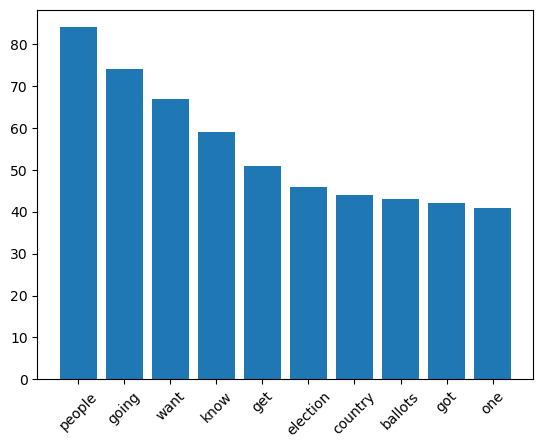

In [8]:
import requests
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import nltk

url = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"
response = requests.get(url) #This block is for fetching the webpage
soup = BeautifulSoup(response.content, 'html.parser') #Using this to extract the text
paragraphs = soup.find_all('p') #Now I'm extracting Trump's speech
speech_text = ' '.join(p.get_text() for p in paragraphs)

nltk.download('punkt') #Here I'm tokenizing and removing stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = word_tokenize(speech_text.lower()) #Filtering out stopwords
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

word_freq = Counter(filtered_words) #Using this to make a frequency distribution of the filtered words
most_common = word_freq.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.xticks(rotation=45)
plt.show()

8. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt
   
What are the 10 most common things Donald Trump "loves?"
10pts

In [10]:
#Your code and answer here:
!pip install requests nltk

In [14]:
import requests
from collections import Counter
import nltk
import re

url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url) #Fetching the speeches here
speeches_text = response.text
sentences = nltk.sent_tokenize(speeches_text)
love_sentences = [sentence for sentence in sentences if "love" in sentence.lower()] #Here I'm extracting the phrases containing "love"
love_words = [] #This is finding the words after "love" for context
stopwords = set(nltk.corpus.stopwords.words('english')) #Getting stopwords
for sentence in love_sentences:
    words = re.findall(r'\b\w+\b', sentence) #Here I'm getting all the words in the sentence
    for i, word in enumerate(words):
        if word.lower() == "love" and i + 1 < len(words):
            following_word = words[i + 1].lower() #This gets the word following "love"
            if following_word not in stopwords: #This checks to see if it's a stopword or not
                love_words.append(following_word)
love_word_freq = Counter(love_words) #Here I'm counting the most common words following "love"
most_common_loves = love_word_freq.most_common(10)
print("Top 10 things Donald Trump loves:")
for word, count in most_common_loves:
    print(f"{word}: {count}")

Top 10 things Donald Trump loves:
china: 5
florida: 4
mexico: 4
israel: 3
everybody: 3
bobby: 3
nevada: 2
john: 2
polls: 2
love: 2


9. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?
10pts

In [16]:
#Your code and answer here:
url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url)
speeches_text = response.text

nltk.download('punkt')
words = nltk.word_tokenize(speeches_text)

countries = [
    "afghanistan", "albania", "algeria", "argentina", "armenia", "australia",
    "austria", "azerbaijan", "bahamas", "bahrain", "bangladesh", "barbados",
    "belarus", "belgium", "belize", "benin", "bhutan", "bolivia", "bosnia",
    "botswana", "brazil", "brunei", "bulgaria", "burkina", "burundi",
    "cambodia", "canada", "chad", "china", "colombia", "comoros", "costa rica",
    "croatia", "cuba", "cyprus", "czech republic", "denmark", "djibouti",
    "dominica", "dominican republic", "ecuador", "egypt", "el salvador",
    "equatorial guinea", "eritrea", "estonia", "eswatini", "ethiopia",
    "finland", "france", "gabon", "gambia", "georgia", "germany", "ghana",
    "greece", "grenada", "guatemala", "guinea", "guinea-bissau", "guyana",
    "haiti", "honduras", "hungary", "iceland", "india", "indonesia", "iran",
    "iraq", "ireland", "israel", "italy", "jamaica", "japan", "jordan",
    "kazakhstan", "kenya", "kiribati", "korea", "kuwait", "kyrgyzstan",
    "laos", "latvia", "lebanon", "lesotho", "liberia", "libya", "lithuania",
    "luxembourg", "madagascar", "malawi", "malaysia", "maldives", "mali",
    "malta", "marshall islands", "mauritania", "mauritius", "mexico",
    "micronesia", "moldova", "monaco", "mongolia", "montenegro", "morocco",
    "mozambique", "myanmar", "namibia", "nauru", "nepal", "netherlands",
    "new zealand", "nicaragua", "niger", "nigeria", "north macedonia",
    "norway", "oman", "pakistan", "palau", "panama", "papua new guinea",
    "paraguay", "peru", "philippines", "poland", "portugal", "qatar",
    "romania", "russia", "rwanda", "saudi arabia", "senegal", "serbia",
    "singapore", "slovakia", "slovenia", "solomon islands", "somalia",
    "south africa", "south korea", "spain", "sri lanka", "sweden",
    "switzerland", "syria", "taiwan", "tajikistan", "tanzania", "thailand",
    "togo", "tonga", "trinidad and tobago", "tunisia", "turkey", "turkmenistan",
    "tuvalu", "uganda", "ukraine", "united arab emirates", "united kingdom",
    "uruguay", "uzbekistan", "vanuatu", "vatican city", "venezuela", "vietnam",
    "yemen", "zambia", "zimbabwe"
] #Asked ChatGPT for a list of countries

filtered_countries = [word.lower() for word in words if word.lower() in countries] #Here I'm filtering out country mentions

country_freq = Counter(filtered_countries) #This counts the most common countries mentioned by Trump
top_countries = country_freq.most_common(5) #This gets the top 5 most-mentioned countries

print("Top 5 countries mentioned by Donald Trump (excluding America):")
for country, count in top_countries:
    print(f"{country.capitalize()}: {count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oaw6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 5 countries mentioned by Donald Trump (excluding America):
China: 201
Mexico: 159
Iran: 91
Israel: 83
Iraq: 72


In [20]:
#Not too surprising! I would have expected both China and Iran to be in the top five. Mexico and Israel aren't too surprising either. Iraq surprised me a bit, I would've expected Russia over Iraq.


 In class we talked about tokenizing sentences into words, or parsing texts by single words(unigrams), or two words(bigrams). But you can also tokenize by sentences. Here is some sample code:


In [18]:
import nltk
from nltk.tokenize import sent_tokenize

text = "This is the first sentence. This is the second sentence."
sentences = sent_tokenize(text)

print(sentences)

['This is the first sentence.', 'This is the second sentence.']


In class we talked about final projects and I suggested one of the interesting uses of this technology is to consider conventional thinking on some subject and use Python to more comprehensively and critically evaluate that thinking. We touched on "political thinking" as a good place to apply Python language analyses. In political speeches, certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." 

Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses: "Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association. These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."  
*This is not to say I agree or disagree with this analysis.*  This is just one example of what we touched on in class. 

10. Perform a frequency analysis that provides evidence for or against the assertion made in the Vox article.
Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!
20pts

In [24]:
#Your code and response here:
import requests
import nltk
from nltk import ngrams
from collections import Counter
import re

url = "https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt"
response = requests.get(url)
speeches_text = response.text

speeches_text = re.sub(r'\n+', ' ', speeches_text)  # Remove newlines
speeches_text = re.sub(r'\s+', ' ', speeches_text)  # Remove extra spaces
speeches_text = speeches_text.lower()  # Convert to lowercase

nltk.download('punkt')
words = nltk.word_tokenize(speeches_text)

# Remove stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
filtered_words = [word for word in words if word.isalnum() and word not in stopwords]

# Create n-grams
unigrams = Counter(filtered_words)
bigrams = Counter(ngrams(filtered_words, 2))
trigrams = Counter(ngrams(filtered_words, 3))

# Get the most common
most_common_unigrams = unigrams.most_common(20)
most_common_bigrams = bigrams.most_common(20)
most_common_trigrams = trigrams.most_common(20)

print("Most common unigrams:", most_common_unigrams)
print("Most common bigrams:", most_common_bigrams)
print("Most common trigrams:", most_common_trigrams)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oaw6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common unigrams: [('going', 2055), ('people', 1336), ('know', 1315), ('said', 773), ('want', 760), ('great', 687), ('get', 633), ('like', 627), ('think', 625), ('one', 592), ('country', 535), ('say', 510), ('right', 501), ('look', 401), ('go', 392), ('money', 390), ('lot', 377), ('got', 371), ('many', 366), ('good', 355)]
Most common bigrams: [(('united', 'states'), 117), (('hillary', 'clinton'), 101), (('going', 'happen'), 100), (('going', 'get'), 97), (('going', 'win'), 95), (('going', 'make'), 93), (('think', 'going'), 76), (('take', 'care'), 69), (('years', 'ago'), 65), (('make', 'america'), 65), (('number', 'one'), 62), (('thank', 'much'), 61), (('going', 'take'), 61), (('many', 'people'), 54), (('people', 'know'), 53), (('america', 'great'), 52), (('know', 'going'), 51), (('lot', 'money'), 49), (('lot', 'people'), 48), (('donald', 'trump'), 46)]
Most common trigrams: [(('make', 'america', 'great'), 48), (('going', 'take', 'care'), 39), (('thank', 'thank', 'much'), 20), (('go

One thing I notice immediately (and know from listening to Trump speak over the past nine years) is that Trump uses very simple language, rarely using words with more than two or three syllables. One might surmise that Trump isn't very bright and has a limited vocabulary - or that Trump knows that using flowery language can make one seem elite and distant. I think there's some of both at play, and it's extremely clear that Trump does know how to connect with the "folks" that form his base. He talks like a regular person, like many of the people I grew up with in rural Minnesota. I know them, and I know Trump's relatively simple speech resonates more with most of them than most politicians' heavily calculated speech. In the top 20 unigrams, there isn't a single word with more than two syllables! This first word in this entire list that does have three or more syllables is "Hillary", followed by "America". This is hardly complex language. But I think it's at least partially a calculation on Trump's part.

It's also interesting that, as much as Trump often glorifies a certain past in which America was "great", it seems that a lot of his speech is forward-looking. "Going" appears a ton in this list. That can be compelling, as Trump presents a future in which America can be "great" again, only if he is the one to steer the country in that direction. It's pretty simple and straightforward, again easy to connect with. The synergy between the glorification of the past and the possible "return" of that past in the future is pretty fascinating.

Additionally, you can see in the bigrams and trigrams that Trump offers exceedingly simple solutions to problems: we're going to build a wall to stop illegal immigration, we're going to make Mexico pay for that wall, we're going to bring jobs back to America, we're going to start winning, etc. Trump has never been one to dive deeply into the intricacies of policy, but these simple and repeatable slogans sound great, and you'd be hard pressed to find an American who hasn't heard one of them over the past decade. This tracks with the arguments outlined by the Vox article.

Lastly, it's interesting how frequently Trump says his own name. He often talks in the third person, which many find quite strange, but I think it helps Trump center the conversation around himself. Evidence points to Trump being a narcissist obsessed with personal loyalty, and by repeating his own name often, he reminds listeners that he is the only person who can save America, he is the only one who can defend "real" Americans, etc. It helps reinforce loyalty to him (see his countless scandals over the years and how he's hardly lost any support) and creates a sort of cult of personality around him. It's stunning to look at his rallies and see him almost deified as a cult-like figure, while at Democratic rallies and pre-Trump Republican rallies you would never see such glorification of the candidate (you do, of course, but not at the level that we see with Trump).

## 6. Mired in Mango Madness ##
20pts

Congratulations! In your last semester at Yale, you got a job at the World Bank ! 

Your first assignment is to address the dearth of good data in Mali on Mango quality and production. Your boss put you on a plane to Mali during the harvest season. You are excited, not only because your boss is annoying and wears too much cologne, but international travel is part of the excitement of an international job. You are excited to see the Great Mosque of Djenne, to watch the sunset from the Bandiagara Cliffs, and to dance the night away to  at Le Byblos. Oh yeah, there is the work too. After a particular "rough" night you meet with your colleagues at the office.  You thought you'd be able to just get by making eye contact and nodding while they did most of the work. After all, you are new to the role. No such luck. Your colleagues are thrilled that you can solve their problems by creating an automated call center. Their exact words are, "The Harvard grad ended up quitting, I'm glad we have someone from Yale here to make things right."

You are given an office and a computer. You may have slightly overstated your Python coding skills to get the job, but too late now. They ask if you mind if they watch you code. You tell them that you prefer to work alone, although ask them to lunch later to soften the push back. After the initial panic and hangover subsides you think back to your days in intermediate python at Yale, the encouraging words of your caring but demanding prof,  and then a light flashes in your mind and you think, "I got this." 

You've been tasked with the goal of setting up an automated call center to get data on current market prices, production and quality. There are growers who are both collectives who report these factors, and also smaller growers! Unfortunately, some of these are incentivized to underreport production and prices under the assumption that they will receive more foreign aid. Not all of them though! It's estimated that 10-20% of the self-reporting is innacurate. Callers call the center. Words are processed from speech to text. Text is processed, converted back to speech and then communicated to the caller. 

There are a few challenges you face: 
1. The speech to text algo was trained on French, but most of the farmers who call in speak Bambara. You must translate from Bambara to French, and then French to English, because your boss doesn't speak French and wants things in English and is completely unreasonable.
2. Sometimes the call just ends, sometimes words are sporadic, sometimes the algo. confuses the word "child" and the word "mango"
3. The call in number was once the number for the infant health hotline. People still use the number to try to get immediate emergency care for their infant. Their calls must be redirected or children could die and it would be your fault, not to mention an international incident.
4. The call number is often called by fans and musicians who are given the number by directory assistance because there is a music production company called Mango Mali, a fledgling world music group that markets music from Mali to France.
5. You must try to identify who is lying about their crop yield quality and prices.


**YOUR MISSION**

Write code that accepts the number as an input and then collects user input(in Bambara), translates it to French, and then outputs the data to a csv file in English. Please make sure you write code that addresses the challenges above (1-5). 
Create use cases to demonstrate that your code works and that you have addressed the basic use case, and that you have addressed challenges 1-5.

In [9]:
import csv
import random
import os
from googletrans import Translator

translator = Translator()

def is_valid_number(number):
    """This is a function to validate phone numbers"""
    return number.isdigit() and len(number) == 10

def is_emergency_call(number):
    """This is a function to check if the call is emergency or music-related"""
    return number.startswith("123")  #This is an example emergency number

def is_music_call(number):
    return number.startswith("456")  #This is an example music production number

def collect_data():
    """This is a function to collect data on mango crop yield and quality in Bambara"""
    phone_number = input("Enter the phone number (10 digits): ") #Defining a function to collect the data
    
    if not is_valid_number(phone_number):
        print("Invalid phone number. Please enter a 10-digit number.")
        return False  #Indicating failure

    if is_emergency_call(phone_number):
        print("Redirecting to infant health hotline.")
        return False  #Indicating failure

    if is_music_call(phone_number):
        print("Redirecting to Mango Mali music production.")
        return False  #Indicating failure

    user_input = input("Please provide your crop yield and quality in Bambara: ") #Collecting input from the user in Bambara

    french_input = translator.translate(user_input, dest='fr', src='auto').text #Translating from Bambara to French, then French to English
    english_output = translator.translate(french_input, dest='en', src='fr').text

    print(f"Translated to French: {french_input}")
    print(f"Translated to English: {english_output}") #Displays translations so I know they're occurring and look OK

    if random.random() < 0.1:  #10% chance of suspicious data, simulating data validating here
        print("Data appears suspicious; further verification may be needed.")

    with open("mango_data.csv", mode="a", newline="", encoding="utf-8") as file: #Writing to CSV here
        writer = csv.writer(file)
        writer.writerow([phone_number, english_output])
    
    print("Data collected successfully!")
    return True  #Indicating success here

# Main program loop
if __name__ == "__main__": #Here's the main program loop
    while True:
        success = collect_data()  #Here I'm collecting the data and checking if it's successful
        if not success:
            cont = input("Do you want to collect data from another caller? (yes/no): ")
            while cont.lower() not in ['yes', 'no']:
                cont = input("Please answer 'yes' or 'no': ")
            if cont.lower() != 'yes':
                break
        else:
            cont = input("Do you want to collect data from another caller? (yes/no): ")
            while cont.lower() not in ['yes', 'no']:
                cont = input("Please answer 'yes' or 'no': ")
            if cont.lower() != 'yes':
                break


Enter the phone number (10 digits):  1233333333


Redirecting to infant health hotline.


Do you want to collect data from another caller? (yes/no):  4566666666
Please answer 'yes' or 'no':  yes
Enter the phone number (10 digits):  4566666666


Redirecting to Mango Mali music production.


Do you want to collect data from another caller? (yes/no):  yes
Enter the phone number (10 digits):  1111111111
Please provide your crop yield and quality in Bambara:  mangoro 850, a ka dɔgɔ


Translated to French: 850 mangues
Translated to English: 850 mangoes
Data collected successfully!


Do you want to collect data from another caller? (yes/no):  yes
Enter the phone number (10 digits):  1111111111
Please provide your crop yield and quality in Bambara:  mangoro 850, a ka dɔgɔ


Translated to French: 850 mangues
Translated to English: 850 mangoes
Data collected successfully!


Do you want to collect data from another caller? (yes/no):  yes
Enter the phone number (10 digits):  1111111111
Please provide your crop yield and quality in Bambara:  mangoro 850, a ka dɔgɔ


Translated to French: 850 mangues
Translated to English: 850 mangoes
Data appears suspicious; further verification may be needed.
Data collected successfully!


Do you want to collect data from another caller? (yes/no):  no
